In [ ]:
from portfolio_helpers import *
from market import *
from market_ml import *
from company import *

In [2]:
get_industry_averages()

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'

KeyboardInterrupt: 

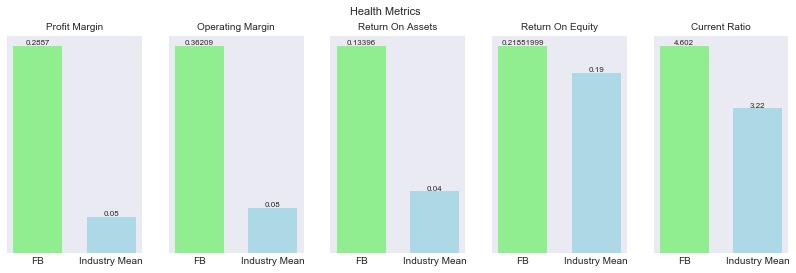

Health Score: 5 / 5


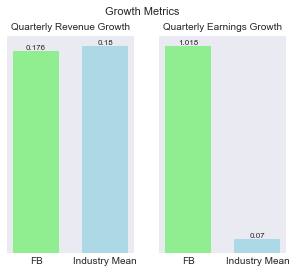

Growth Score: 1 / 2


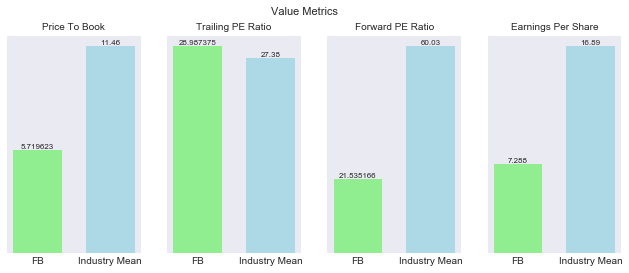

Value Score: 2 / 4
Analyst Target (47 analysts): 12.984000757360592%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.0031321072562977073
Volatility (Standard Dev.): 0.13


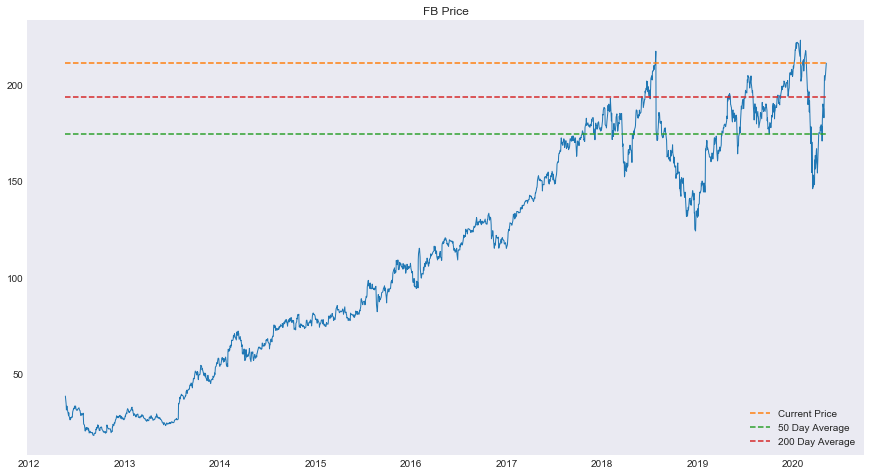

Current price: 211.26
Multiples valuation for FB
FB's ebitda is 32544999424
Industry EV/EBITDA: (Mean = 7.0) (Median = 17.0)
FB's revenue is 73357000704
Industry EV/Revenue: (Mean = 8.0) (Median = 7.0)
FB's earnings are 20957999104
Industry PE ratios: (Mean = 27.0) (Median = 28.0)
Valuation: 251.59665484693738 (using EV/EBITDA multiple)
Valuation: 242.49547488259046 (using EV/revenue multiple)
Valuation: 241.32979986870674 (using PE ratio multiple)


8

In [4]:
c = Company("FB")
c.analyze(comparable_tickers=['GOOG', 'MSFT', 'AAPL', 'SNAP'], filter_comparables=False)

Failed to get industry for AEO
Failed to get industry for DBI
Failed to get industry for DXLG


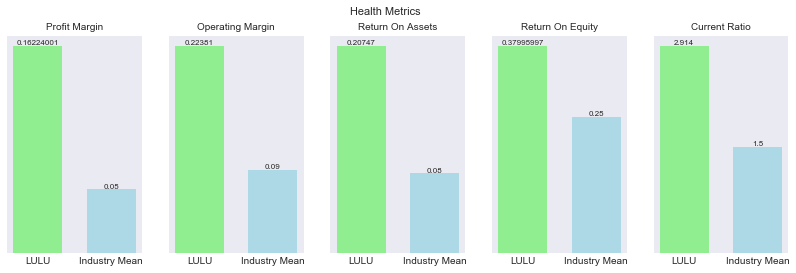

Health Score: 5 / 5


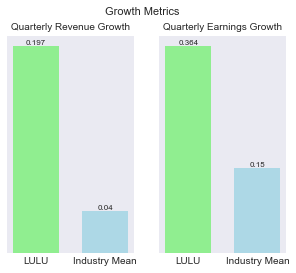

Growth Score: 2 / 2


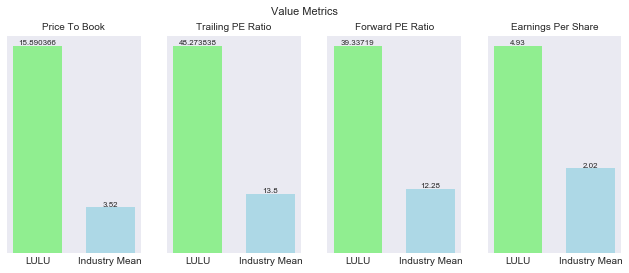

Value Score: 1 / 4
Analyst Target (30 analysts): -4.477078868860051%
Failed to get industry for VTI
Failed to get industry for VTI
Alpha: 0.023317637794227786
Volatility (Standard Dev.): 0.12


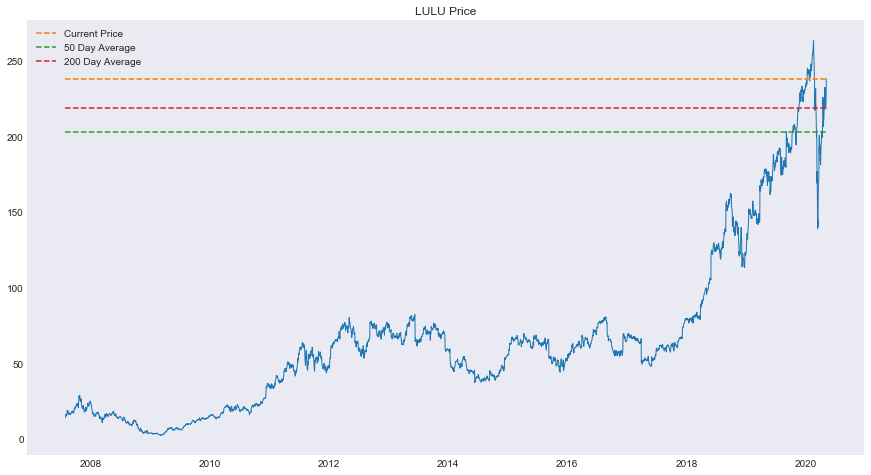

Current price: 237.99
Multiples valuation for LULU
LULU's ebitda is 1052550976
Industry EV/EBITDA: (Mean = 9.0) (Median = 6.0)
LULU's revenue is 3979296000
Industry EV/Revenue: (Mean = 1.0) (Median = 1.0)
LULU's earnings are 645596032
Industry PE ratios: (Mean = 14.0) (Median = 11.0)
Valuation: 57.572515903132334 (using EV/EBITDA multiple)
Valuation: 30.796742301779144 (using EV/revenue multiple)
Valuation: 58.51648366477957 (using PE ratio multiple)


8

In [3]:
c = Company("LULU")
c.analyze()

In [1]:
portfolio = create_portfolio(["EA", "NVDA", "MSFT", "AAPL"])#["BABA", "AMZN", "AAPL", "BIDU", "SFUN", "REGN", "TSLA", "DDD", "NVDA"])
w = portfolio.calculate_optimal_weights()
print(w)
calculate_quantity_shares_per_ticker(portfolio, 200000)

NameError: name 'create_portfolio' is not defined

In [7]:
w

array([0.11448706, 0.13235663, 0.1453855 , 0.36572849, 0.24204231])

In [4]:
[atvi, sne, ea, msft, cost]
w = [0.26934317, 0.12867101, 0.47506942, 0.04599636, 0.080920049]
print(p.calculate_sharpe_ratio(w, .0955, cov_matrix=cov_matrix))
print(p.calculate_sharpe_ratio([0.2, 0.1, 0.5, 0.1, 0.1], 0.0955, cov_matrix=cov_matrix))

0.4748825765244376
0.47215141125452564


In [7]:
w = [0.4, 0.4, 0.3]
p.calculate_sharpe_ratio(w, 9.5, cov_matrix=cov_matrix)

TypeError: can only concatenate str (not "float") to str

In [30]:
for price in data:
    print(price)
ase = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(len(data))]
print(date_list)

AttributeError: 'float' object has no attribute 'index'

In [9]:
data

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-04-09    573.000000
2020-04-13    650.950012
2020-04-14    709.890015
2020-04-15    729.830017
2020-04-16    745.210022
Name: Adj Close, Length: 2467, dtype: float64

In [4]:
rank_companies_by_score([company("MSFT"), company("NKE"), company("EIX"), company("SNE"), company("FB")])

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 1 / 1
Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1
Health Score: 2 / 4
Growth Score: 0 / 1
Value Score: 1 / 1
Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
a = company("MSFT")
a.analyze()

61264998400
845404032
29729000
-4536000
-9904000
43000000
397200000
-11659000
-80048000
-8577936


In [41]:
a = company("NKE")
a.analyze()

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


In [11]:
a = company("TSLA")
a.analyze()

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


In [16]:
a = company("EIX")
a.analyze()

Health Score: 2 / 4
Growth Score: 0 / 1
Value Score: 1 / 1


In [17]:
a = company("FB")
a.analyze()

Health Score: 4 / 4
Growth Score: 1 / 2
Value Score: 0 / 1


In [1]:
from portfolio import *    
        

In [4]:
original = Security("Original Portfolio")
abc = Security("ABC Company")
original.set_monthly_return(0.67)
original.set_monthly_stdev(2.37)
abc.set_monthly_return(1.25)
abc.set_monthly_stdev(2.95)

port = Portfolio([original, abc])
print(port.calculate_expected_return([0.9, 0.1]))
corr_matrix = [[1, 0.4],
              [0.4, 1]]
port.calculate_expected_stdev([0.9, 0.1], corr_matrix=corr_matrix)


0.7280000000000001


2.267179304774989

In [5]:
original = Security("Original Portfolio")
gov = Security("ABC Company")
original.set_monthly_return(0.67)
original.set_monthly_stdev(2.37)
gov.set_monthly_return(0.42)
gov.set_monthly_stdev(0)

port = Portfolio([original, gov])
print(port.calculate_expected_return([0.9, 0.1]))
corr_matrix = [[1, 0],
              [0, 1]]
port.calculate_expected_stdev([0.9, 0.1], corr_matrix=corr_matrix)

0.6450000000000001


2.133

In [45]:
2.37 * 2.95 * 0.4

2.7966000000000006